This was run with my new (edited) version of `ip_diffim` and:
```
doMerge = True
doDecorrelation = True
detection.thresholdValue = 5.5
```

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 999

#  LSST imports:
import lsst.afw.image as afwImage
from lsst.afw.table import (SourceTable, SourceCatalog)
from lsst.meas.base import SingleFrameMeasurementConfig
from lsst.meas.algorithms import (SourceDetectionConfig, SourceDetectionTask)

import diffimTests as dit

D = P - N   --> P = D + N

In [93]:
posImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20111115.fits')
negImage = afwImage.ExposureF('WIYN/test_dr2/diff/SN2011gy_A_H_20111115/matchexp.fits')
# negImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20121028.fits')
diffim = afwImage.ExposureF('WIYN/test_dr2/diff/SN2011gy_A_H_20111115/diffexp.fits')

#posImage = afwImage.ExposureF(diffim, True)
#posMImage = posImage.getMaskedImage()
#posMImage += negImage.getMaskedImage()

#plt.imshow(posImage.getPsf().computeImage().getArray(), interpolation='none')
#plt.imshow(diffim.getPsf().computeImage().getArray()-posImage.getPsf().computeImage().getArray(), interpolation='none')

In [94]:
import os
import sys
import lsst.utils
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import lsst.afw.math as afwMath
import lsst.meas.algorithms as measAlg
import lsst.ip.diffim as ipDiffim
import lsst.pex.logging as logging
import lsst.ip.diffim.diffimTools as diffimTools

verbosity = 5
logging.Trace_setVerbosity('lsst.ip.diffim', verbosity)
logging.Trace_setVerbosity('ImagePsfMatchTask', verbosity)

display = False

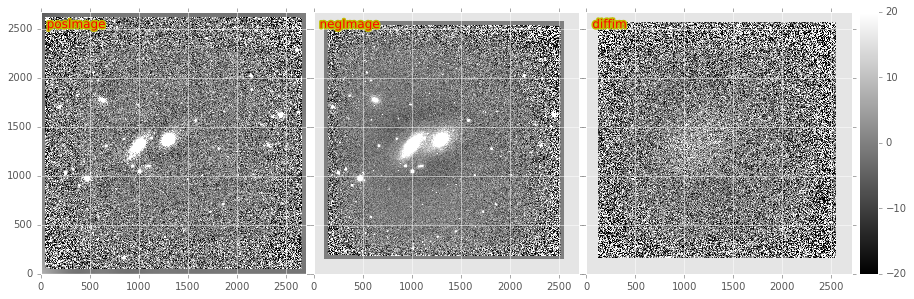

In [95]:
dit.plotImageGrid((posImage.getMaskedImage().getArrays()[0], 
               negImage.getMaskedImage().getArrays()[0],
              diffim.getMaskedImage().getArrays()[0]), 
              imScale=5., clim=(-20,20), 
              titles=['posImage', 'negImage', 'diffim'])

((-6.6186327105177325, 6.6186349981603243), 0, 46)
((-8.3533215334116431, 8.3533249843061572), 0, 55)
((-338.33836927904008, 338.33848622120894), 0, 311)


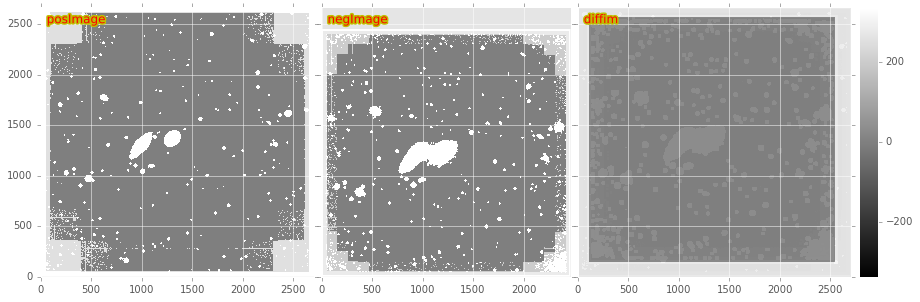

In [299]:
reload(dit)
dit.plotImageGrid((posImage.getMaskedImage().getArrays()[1], 
               negImage.getMaskedImage().getArrays()[1],
              diffim.getMaskedImage().getArrays()[1]), 
              imScale=5., #clim=(-20,20), 
              titles=['posImage', 'negImage', 'diffim'])

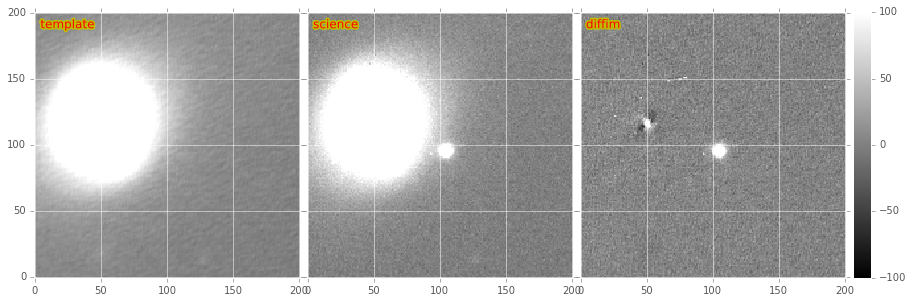

In [97]:
offset = 1350
bbox = afwGeom.Box2I(afwGeom.Point2I(offset-100, offset-100), afwGeom.Point2I(offset+100, offset+100))
templateSubImage = afwImage.ExposureF(negImage, bbox)
scienceSubImage  = afwImage.ExposureF(posImage, bbox)
diffimSubImage = afwImage.ExposureF(diffim, bbox)

dit.plotImageGrid((templateSubImage.getMaskedImage().getArrays()[0], 
               scienceSubImage.getMaskedImage().getArrays()[0],
              diffimSubImage.getMaskedImage().getArrays()[0]), 
              imScale=5., clim=(-100,100), 
              titles=['template', 'science', 'diffim'])

In [27]:
import lsst.afw.table as afwTable
import pandas as pd

catalog = afwTable.SourceCatalog_readFits('WIYN/test_dr5/diff/SN2011gy_A_H_20111115/diaSrc.fits')
df = pd.DataFrame({col: catalog.columns[col] for col in catalog.schema.getNames()})
print df.shape
sizeme(df.head())

(381, 158)


<__main__.sizeme instance at 0x1411dd830>

211


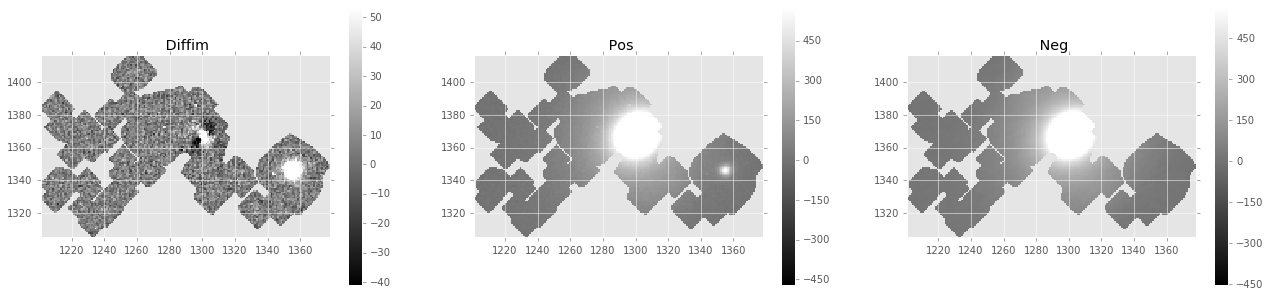

In [38]:
import lsstUtils
reload(lsstUtils)
source = lsstUtils.searchCatalog(catalog, 1350, 1350)
fig = lsstUtils.displayCutouts(source, diffim, posImage=posImage, negImage=negImage, asHeavyFootprint=True, 
                               figsize=(22., 5.))

In [29]:
fp = source.getFootprint()
pks = fp.getPeaks()
print len(pks)
print [p.getPeakValue() for p in pks]
print [p.getCentroid() for p in pks]
print source.getCentroid()

38
[266.6424560546875, 76.16890716552734, 9.828201293945312, 9.480353355407715, 9.443103790283203, 9.079390525817871, 8.843234062194824, 8.825767517089844, 8.760138511657715, 8.745244979858398, 8.679484367370605, 8.623943328857422, 8.3441743850708, 8.338929176330566, 8.302602767944336, 8.265487670898438, 8.116466522216797, 8.082351684570312, 7.990068435668945, 7.969822406768799, 7.924975395202637, 7.841139793395996, 7.81502103805542, 7.797753810882568, 7.698698997497559, 7.67926025390625, 7.672537326812744, 7.5176920890808105, 7.514037132263184, 7.466331481933594, 7.3864922523498535, 7.349198341369629, 7.341006278991699, 7.318527698516846, 7.279447078704834, -8.035001754760742, -9.071342468261719, -10.860798835754395]
[Point2D(1355, 1346), Point2D(1301, 1366), Point2D(1296, 1385), Point2D(1256, 1405), Point2D(1300, 1347), Point2D(1332, 1323), Point2D(1273, 1383), Point2D(1261, 1368), Point2D(1240, 1321), Point2D(1307, 1332), Point2D(1272, 1359), Point2D(1278, 1360), Point2D(1347, 1323)

In [37]:
src = df.iloc[211]
print 'GaussianCentroid:\t', src.base_GaussianCentroid_x, src.base_GaussianCentroid_y
print 'PeakCentroid:\t\t', src.base_PeakCentroid_x, src.base_PeakCentroid_y
print 'SdssCentroid:\t\t', src.base_SdssCentroid_x, src.base_SdssCentroid_y
print 'NaiveCentroid:\t\t', src.base_NaiveCentroid_x, src.base_NaiveCentroid_y
print 'DipoleFit_centroid:\t', src.ip_diffim_DipoleFit_centroid_x, src.ip_diffim_DipoleFit_centroid_y
print 'DipoleFit_pos_centroid:\t', src.ip_diffim_DipoleFit_pos_centroid_x, src.ip_diffim_DipoleFit_pos_centroid_y
print 'NaiveDipoleCentroid:\t', src.ip_diffim_NaiveDipoleCentroid_x, src.ip_diffim_NaiveDipoleCentroid_y
print 'NaiveDipoleCentroid_pos:', src.ip_diffim_NaiveDipoleCentroid_pos_x, src.ip_diffim_NaiveDipoleCentroid_pos_y
print 'PsfDipoleFlux_centroid:\t', src.ip_diffim_PsfDipoleFlux_centroid_x, src.ip_diffim_PsfDipoleFlux_centroid_y

GaussianCentroid:	1354.66603362 1345.56345231
PeakCentroid:		1355.0 1346.0
SdssCentroid:		1354.20535917 1343.00878079
NaiveCentroid:		1352.29818277 1345.96650961
DipoleFit_centroid:	1294.88888652 1363.43792695
DipoleFit_pos_centroid:	1289.30277324 1359.677391
NaiveDipoleCentroid:	1352.96094731 1346.98330944
NaiveDipoleCentroid_pos: 1354.91418457 1345.92919922
PsfDipoleFlux_centroid:	nan nan


In [119]:
import os
import sys
import lsst.utils
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import lsst.afw.math as afwMath
import lsst.meas.algorithms as measAlg
import lsst.ip.diffim as ipDiffim
import lsst.pex.logging as logging
import lsst.ip.diffim.diffimTools as diffimTools

verbosity = 1  # 5
logging.Trace_setVerbosity('lsst.ip.diffim', verbosity)
logging.Trace_setVerbosity('ImagePsfMatchTask', verbosity)

display = False

In [120]:
# D = I - (K.x.T + bg)
# Let's reload the images just to be safe
posImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20111115.fits')
#negImage = afwImage.ExposureF('WIYN/test_dr2/diff/SN2011gy_A_H_20111115/matchexp.fits')
negImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20121028.fits')
diffim = afwImage.ExposureF('WIYN/test_dr2/diff/SN2011gy_A_H_20111115/diffexp.fits')

config = ipDiffim.ImagePsfMatchTask.ConfigClass()
config.kernel.name = "AL"
subconfig = config.kernel.active

# Some of the tests are sensitive to the centroids returned by
# "stdev" vs "pixel_stdev"
subconfig.detectionConfig.detThresholdType = "pixel_stdev"

# Impacts some of the test values
subconfig.constantVarianceWeighting = True

scienceImage = posImage
templateImage = negImage

if False:
    bgConfig = subconfig.afwBackgroundConfig
    bgConfig.useApprox = False
    bgConfig.binSize = 512
    diffimTools.backgroundSubtract(bgConfig, [templateImage.getMaskedImage(), scienceImage.getMaskedImage()])

In [307]:
subconfig.fitForBackground = True
subconfig.spatialKernelOrder = 1
subconfig.spatialBgOrder = 0

templateSubImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20121028.fits')
scienceSubImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20111115.fits')

subconfig.spatialModelType = 'chebyshev1'  # this is the default (see psfMatch.py)
psfmatch1 = ipDiffim.ImagePsfMatchTask(config=config)
results1 = psfmatch1.subtractExposures(templateSubImage, scienceSubImage, doWarping=True)
spatialKernel1      = results1.psfMatchingKernel
backgroundModel1    = results1.backgroundModel

#subconfig.spatialModelType = 'polynomial'
#psfmatch2 = ipDiffim.ImagePsfMatchTask(config=config)
#results2 = psfmatch2.subtractExposures(templateSubImage, scienceSubImage, doWarping=True)
#spatialKernel2      = results2.psfMatchingKernel
#backgroundModel2    = results2.backgroundModel

print spatialKernel1.getSpatialFunctionList()[0].toString()

# First order term has zero spatial variation and sum = kernel sum
kp1par0 = spatialKernel1.getSpatialFunctionList()[0].getParameters()
kp2par0 = spatialKernel2.getSpatialFunctionList()[0].getParameters()
#self.assertAlmostEqual(kp1par0[0], kp2par0[0], delta=1e-5)
print kp1par0[0], kp2par0[0]

# More improtant is the kernel needs to be then same when realized at a coordinate
kim1 = afwImage.ImageD(spatialKernel1.getDimensions())
#kim2 = afwImage.ImageD(spatialKernel2.getDimensions())
ksum1 = spatialKernel1.computeImage(kim1, False, 0.0, 0.0)
#ksum2 = spatialKernel2.computeImage(kim2, False, 0.0, 0.0)
print ksum1

# Nterms (zeroth order)
#print backgroundModel1.getNParameters(), backgroundModel2.getNParameters()
# Zero value in function
#print backgroundModel1.getParameters()[0], backgroundModel2.getParameters()[0]
# Function evaluates to zero
#print backgroundModel1(0, 0), backgroundModel2(0, 0)
# Spatially...
#print backgroundModel1(10, 10), backgroundModel2(10, 10)

Chebyshev1Function2 [1, Box2D(Point2D(-0.5, -0.5), Extent2D(2709, 2670))]Function2: parameters: [ 1.09807, 0, 0 ]
1.09806878435 0.984908996053
1.09806878435


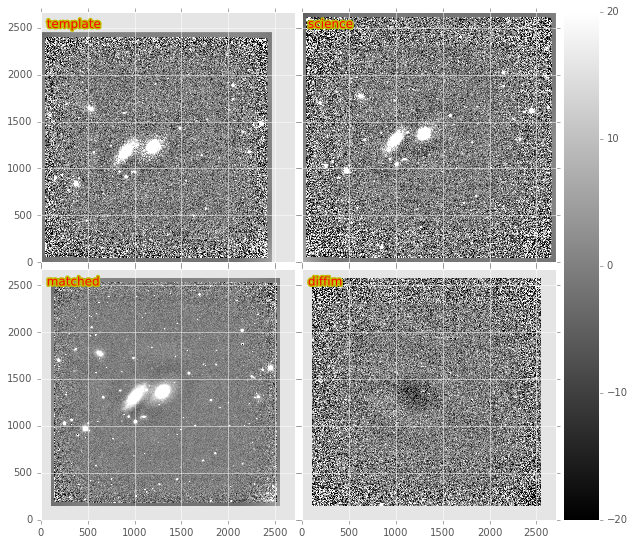

In [104]:
reload(dit)
dit.plotImageGrid((templateSubImage.getMaskedImage().getArrays()[0], 
               scienceSubImage.getMaskedImage().getArrays()[0],
               results1.matchedImage.getArrays()[0], 
               results1.subtractedExposure.getMaskedImage().getArrays()[0]), 
              imScale=5., clim=(-20,20), 
              titles=['template', 'science', 'matched', 'diffim'])

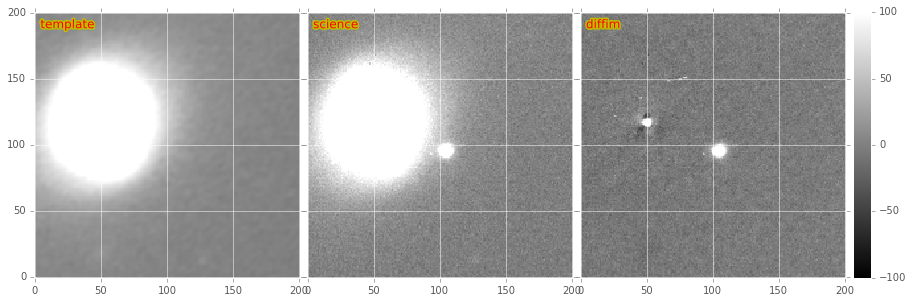

In [109]:
offset = 1350
bbox = afwGeom.Box2I(afwGeom.Point2I(offset-100, offset-100), afwGeom.Point2I(offset+100, offset+100))
#templateSubImage = afwImage.ExposureF(negImage, bbox)
templateSubImage = afwImage.ExposureF(results1.matchedExposure, bbox)
scienceSubImage  = afwImage.ExposureF(posImage, bbox)
diffimSubImage = afwImage.ExposureF(results1.subtractedExposure, bbox)

dit.plotImageGrid((templateSubImage.getMaskedImage().getArrays()[0], 
               scienceSubImage.getMaskedImage().getArrays()[0],
              diffimSubImage.getMaskedImage().getArrays()[0]), 
              imScale=5., clim=(-100,100), 
              titles=['template', 'science', 'diffim'])

OK, compute the correction kernel... For now, we force two assumptions:

1. use the median image variance as $\sigma^2$
2. use the matching kernel from the center of the image, not using spatially varying version

1354.5 1335.0
1.0


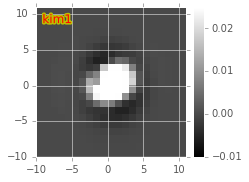

In [123]:
bbox = scienceSubImage.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
print xcen, ycen
ksum1 = spatialKernel1.computeImage(kim1, True, xcen, ycen)
#ksum2 = spatialKernel2.computeImage(kim2, True, xcen, ycen)
print ksum1 #, ksum2
reload(dit)
dit.plotImageGrid((kim1,), imScale=3, nrows_ncols=(1,1), titles=['kim1'], clim=(-0.01, 0.025))

In [129]:
import scipy.stats
reload(dit)

templateSubImage = templateImage # afwImage.ExposureF(templateImage, bbox)
scienceSubImage = scienceImage  # afwImage.ExposureF(scienceImage, bbox)

sig1 = templateSubImage.getMaskedImage().getVariance().getArray().flatten()
sig1 = sig1[~np.isnan(sig1) & np.isfinite(sig1)]
print scipy.stats.describe(sig1, None)
sig2 = scienceSubImage.getMaskedImage().getVariance().getArray().flatten()
sig2 = sig2[~np.isnan(sig2) & np.isfinite(sig2)]
print scipy.stats.describe(sig2, None)
print dit.computeClippedImageStats(sig1) #, dit.computeClippedImageStats(templateSubImage.getMaskedImage().getImage().getArray())
print dit.computeClippedImageStats(sig2) #, dit.computeClippedImageStats(scienceSubImage.getMaskedImage().getImage().getArray())
sig1squared, _ = dit.computeClippedImageStats(sig1)
sig2squared, _ = dit.computeClippedImageStats(sig2)
print np.sqrt(sig1squared), np.sqrt(sig2squared)

DescribeResult(nobs=6051564, minmax=(51.594288, 51.594288), mean=51.594067, variance=4.8952653e-08, skewness=0.9999971985816956, kurtosis=-1.999990368043253)
DescribeResult(nobs=7233030, minmax=(76.774559, 76.774559), mean=76.774155, variance=1.6350535e-07, skewness=1.0000072717666626, kurtosis=-2.0000050693994447)
(51.594067, 0.00022125244)
(76.774155, 0.00040435791)
7.1829 8.76209


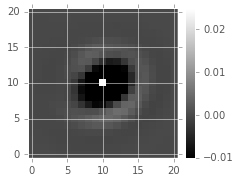

In [130]:
#corrKernel1 = dit.computeCorrectionKernelALZC(kim1.getArray(), sig1=np.sqrt(sig1squared), sig2=np.sqrt(sig2squared))
corrKernel1 = ipDiffim.DecorrelateALKernelTask._computeDecorrelationKernel(kim1.getArray(), svar=sig1squared, tvar=sig2squared)
#corrKernel2 = ipDiffim.DecorrelateALKernelTask._computeDecorrelationKernel(kim2.getArray(), svar=sig1squared, tvar=sig2squared)
dit.plotImageGrid((corrKernel1,), imScale=3., clim=(-0.01,0.025)) #, cmap=None)

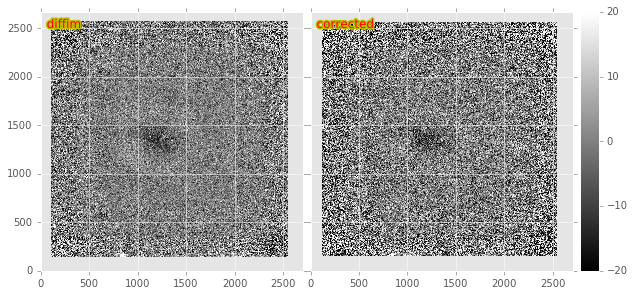

In [150]:
diffim = results1.subtractedExposure #.getMaskedImage().getArrays()[0]
pci, _ = ipDiffim.DecorrelateALKernelTask._doConvolve(diffim, corrKernel1)

dit.plotImageGrid((diffim, pci), 
              imScale=5., clim=(-20,20), 
              titles=['diffim', 'corrected'])

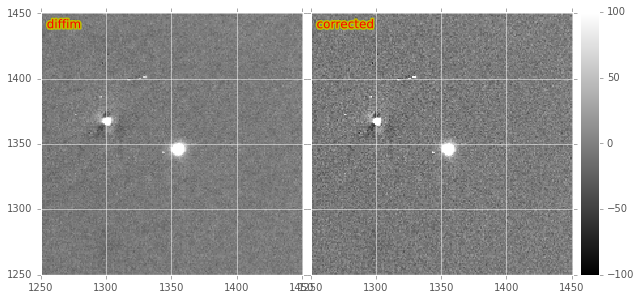

In [132]:
offset = 1350
bbox = afwGeom.Box2I(afwGeom.Point2I(offset-100, offset-100), afwGeom.Point2I(offset+100, offset+100))

diffimSubImageOrig = afwImage.ExposureF(results1.subtractedExposure, bbox)
diffimSubImage = afwImage.ExposureF(pci, bbox)
dit.plotImageGrid((diffimSubImageOrig, diffimSubImage), 
              imScale=5., clim=(-100,100), 
              titles=['diffim', 'corrected'])

(-0.13108979, 13.059261)
(-0.14132172, 8.8107271)
11.33


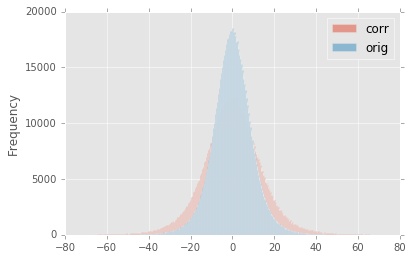

In [151]:
import pandas as pd

pcix = pci.getMaskedImage().getImage().getArray()
stats = dit.computeClippedImageStats(pcix[~np.isnan(pcix)]); print stats
pcix = pcix[(pcix > stats[0]-stats[1]*5.) & (pcix < stats[0]+stats[1]*5.)]
diffimx = diffim.getMaskedImage().getImage().getArray()
stats = dit.computeClippedImageStats(diffimx[~np.isnan(diffimx)]); print stats
diffimx = diffimx[(diffimx > stats[0]-stats[1]*5.) & (diffimx < stats[0]+stats[1]*5.)]
print np.sqrt(sig1squared + sig2squared)
diffimx = diffimx[:len(pcix)]
pcix = pcix[:len(diffimx)]

df = pd.DataFrame({'corr': pcix.flatten(), 'orig': diffimx.flatten()})
df.plot.hist(alpha=0.5, bins=2000)
#plt.xlim(-0.5, 0.5)

4.98337028321
2.49016612157


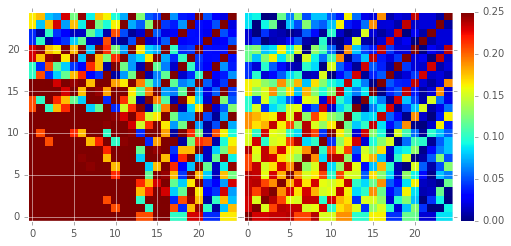

In [155]:
cov1, stat = dit.computePixelCovariance(np.nan_to_num(diffim.getMaskedImage().getImage().getArray()))
print stat
cov2, stat = dit.computePixelCovariance(np.nan_to_num(pci.getMaskedImage().getImage().getArray()))
print stat
dit.plotImageGrid((cov1, cov2), imScale=4., clim=(0, 0.25), cmap=None)

Run the task, stupid!

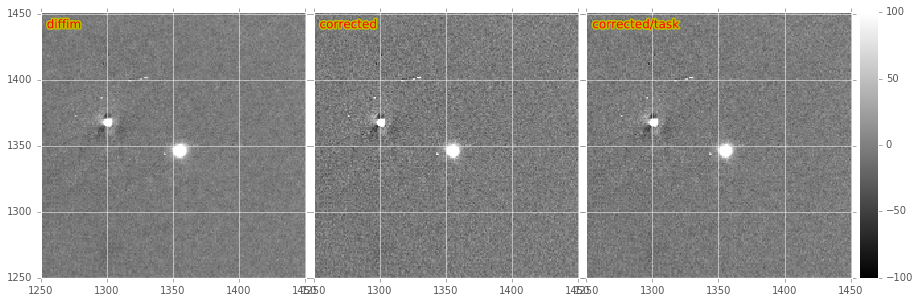

In [205]:
decorrConfig = ipDiffim.DecorrelateALKernelConfig()
decorrelate = ipDiffim.DecorrelateALKernelTask(config=decorrConfig)
decorrResult = decorrelate.run(scienceImage, templateImage, diffim, results1.psfMatchingKernel)
subtractedExposure = decorrResult.correctedExposure

offset = 1350
bbox = afwGeom.Box2I(afwGeom.Point2I(offset-100, offset-100), afwGeom.Point2I(offset+100, offset+100))

diffimSubImageTask = afwImage.ExposureF(subtractedExposure, bbox)
dit.plotImageGrid((diffimSubImageOrig, diffimSubImage, diffimSubImageTask), 
              imScale=5., clim=(-100,100), 
              titles=['diffim', 'corrected', 'corrected/task'])

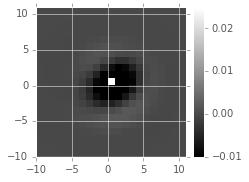

In [142]:
corrKernel = decorrResult.correctionKernel
corrKernelImg = afwImage.ImageD(corrKernel.getBBox())
decorrResult.correctionKernel.computeImage(corrKernelImg, True, 0., 0.)
dit.plotImageGrid((corrKernelImg,), imScale=3., clim=(-0.01,0.025)) #, cmap=None)

4.98337028321
3.43143267766


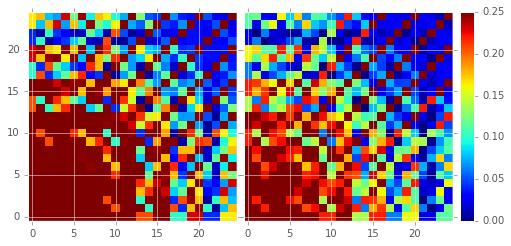

In [156]:
cov1, stat = dit.computePixelCovariance(np.nan_to_num(diffim.getMaskedImage().getImage().getArray()))
print stat
cov2, stat = dit.computePixelCovariance(np.nan_to_num(subtractedExposure.getMaskedImage().getImage().getArray()))
print stat
dit.plotImageGrid((cov1, cov2), imScale=4., clim=(0, 0.25), cmap=None)

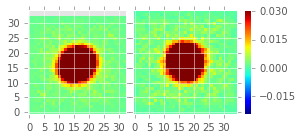

In [173]:
from scipy.fftpack import fft2, fftshift
reload(dit)
tpsf = templateImage.getPsf().computeImage().getArray()
tmp1 = fft2(tpsf)
spsf = scienceImage.getPsf().computeImage().getArray()
tmp2 = fft2(spsf)
dit.plotImageGrid((np.abs(fftshift(tmp1)), np.abs(fftshift(tmp2))), cmap=None)

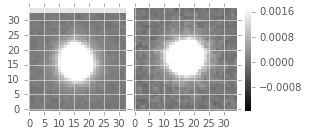

In [174]:
dit.plotImageGrid((tpsf, spsf))

In [227]:
tbox = results1.warpedExposure.getBBox()
sbox = scienceImage.getBBox()
sbox.clip(tbox)

tsub = afwImage.ExposureF(results1.warpedExposure, sbox)
ssub = afwImage.ExposureF(scienceImage, sbox)
print tsub.getMaskedImage().getImage().getArray().shape
print tpsf.shape
tpsf2 = np.zeros_like(tsub.getMaskedImage().getImage().getArray())
tpsf2[(tpsf2.shape[0]//2-tpsf.shape[0]//2):(tpsf2.shape[0]//2+tpsf.shape[0]//2+1),
      (tpsf2.shape[1]//2-tpsf.shape[1]//2):(tpsf2.shape[1]//2+tpsf.shape[1]//2+1)] = tpsf
tpsf2 *= np.mean(tpsf) / np.mean(tpsf2)
print np.mean(tpsf), np.mean(tpsf2)
print ssub.getMaskedImage().getImage().getArray().shape
print spsf.shape
spsf2 = np.zeros_like(ssub.getMaskedImage().getImage().getArray())
spsf2[(spsf2.shape[0]//2-spsf.shape[0]//2):(spsf2.shape[0]//2+spsf.shape[0]//2+1),
      (spsf2.shape[1]//2-spsf.shape[1]//2):(spsf2.shape[1]//2+spsf.shape[1]//2+1)] = spsf
spsf2 *= np.mean(spsf) / np.mean(spsf2)
print np.mean(spsf), np.mean(spsf2)

(2670, 2709)
(33, 33)
0.000918436756837 0.000918437
(2670, 2709)
(35, 35)
0.000816341243454 0.000816341


In [228]:
zogy = dit.performZOGY(np.nan_to_num(tsub.getMaskedImage().getImage().getArray()),
                      np.nan_to_num(ssub.getMaskedImage().getImage().getArray()),
                      tpsf2, spsf2)

4.98337028321
3.43143267766
9.48778222291
(0, 0.25)
(0, 0.25)
(0, 0.25)


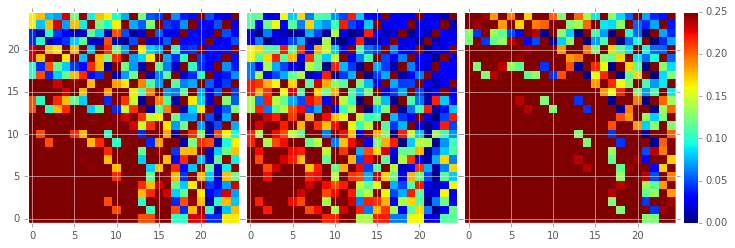

In [229]:
cov1, stat = dit.computePixelCovariance(np.nan_to_num(diffim.getMaskedImage().getImage().getArray()))
print stat
cov2, stat = dit.computePixelCovariance(np.nan_to_num(subtractedExposure.getMaskedImage().getImage().getArray()))
print stat
cov3, stat = dit.computePixelCovariance(np.nan_to_num(zogy))
print stat
dit.plotImageGrid((cov1, cov2, cov3), imScale=4., clim=(0, 0.25), cmap=None)

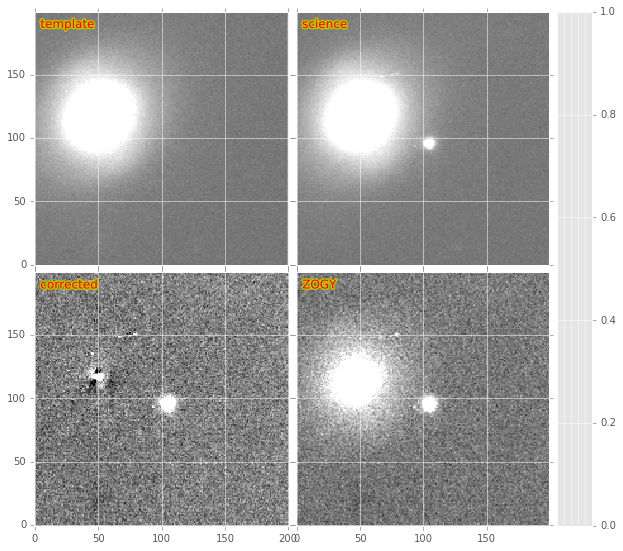

In [234]:
reload(dit)
offset = 1350
bbox = afwGeom.Box2I(afwGeom.Point2I(offset-100, offset-100), afwGeom.Point2I(offset+100, offset+100))
diffimSubImageTask = afwImage.ExposureF(subtractedExposure, bbox)

tmp = zogy[(offset-100):(offset+100), (offset-100):(offset+100)]
ttmp = results1.warpedExposure.getMaskedImage().getImage().getArray()[(offset-100):(offset+100), (offset-100):(offset+100)]
stmp = ssub.getMaskedImage().getImage().getArray()[(offset-100):(offset+100), (offset-100):(offset+100)]
dit.plotImageGrid((ttmp, stmp, diffimSubImageTask.getMaskedImage().getImage().getArray(), tmp), 
              imScale=5., cbar=False, #clim=(-100,100),
              titles=['template', 'science', 'corrected', 'ZOGY'])

Let's do the same thing that we did in diffimTests/19. check variance planes.ipynb -- investigate spatial kernel across image and variances across image.

HERE: 100


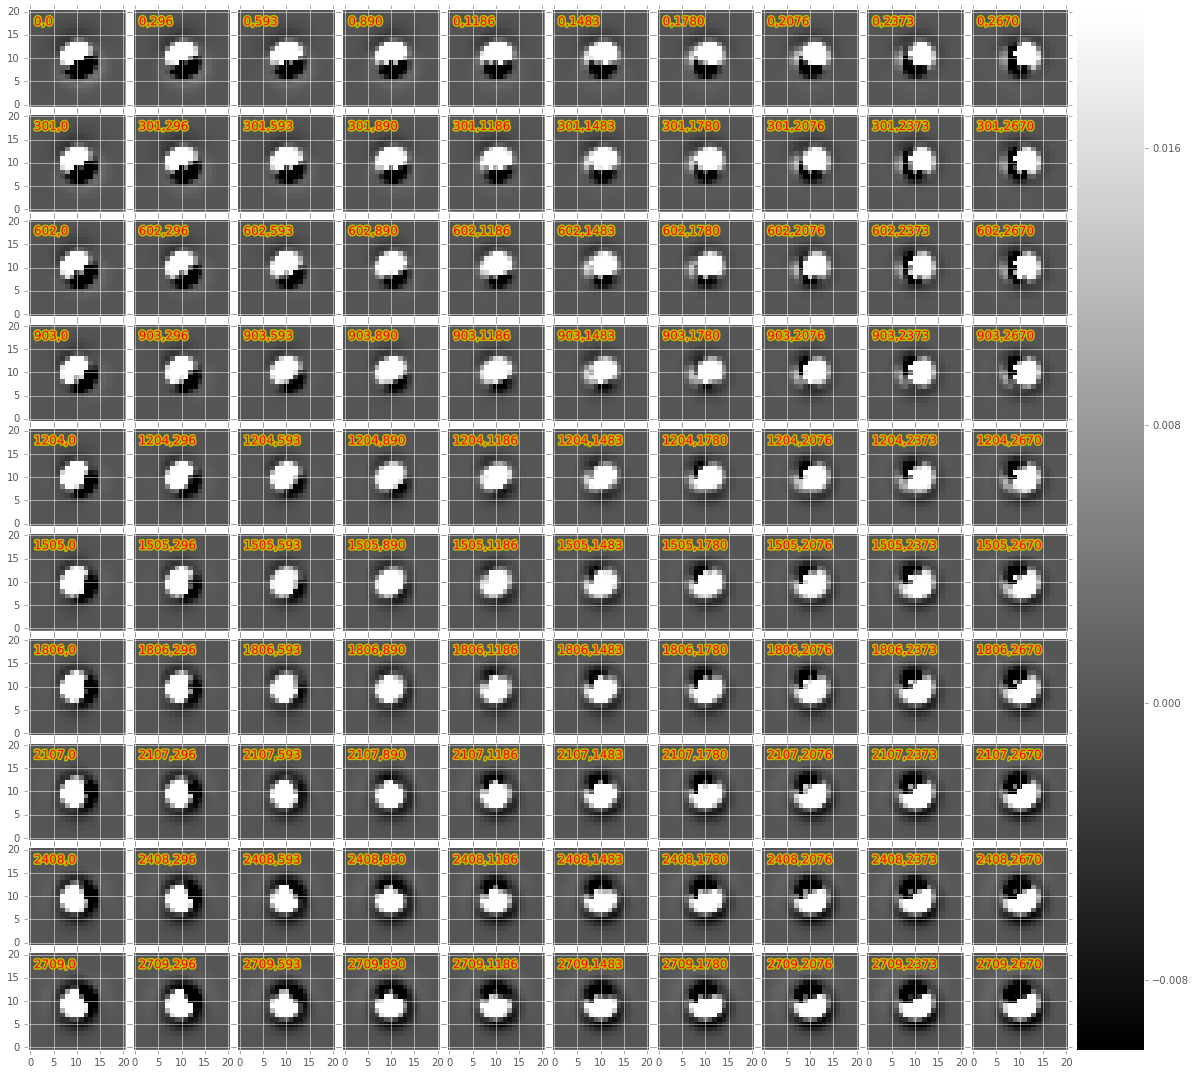

In [308]:
spatialKernel = spatialKernel1
bbox = ssub.getBBox()

def getSpatialKernelImage(spatialKernel, xcen, ycen):
    kimg = afwImage.ImageD(spatialKernel.getDimensions())
    spatialKernel.computeImage(kimg, True, xcen, ycen)
    return kimg.getArray()

kimages = [getSpatialKernelImage(spatialKernel, xc, yc) for
           xc in np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.) for
           yc in np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.)]
print "HERE:", len(kimages)

titles = ['%d,%d' % (x,y) for \
          x in np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.) for \
          y in np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.)]
dit.plotImageGrid(kimages, imScale=2., clim=(-0.01, 0.02), titles=titles)

Find the matching kernels that are the most different, then compare them and their resulting decor. kernels...

0.802919817027 0.0497745794568 99 [0, 99]


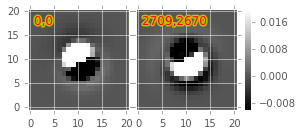

In [303]:
diffs = [np.sqrt(np.sum((k1 - k2)**2.)) for k1 in kimages for k2 in kimages]
coords = [[i, j] for i in range(len(kimages)) for j in range(len(kimages))]
print np.max(diffs), np.min(diffs[diffs!=0.0]), np.argmax(diffs), coords[np.argmax(diffs)]
coo = coords[np.argmax(diffs)]
dit.plotImageGrid([kimages[coo[0]], kimages[coo[1]]], imScale=2., clim=(-0.01, 0.02), 
                  titles=[titles[coo[0]], titles[coo[1]]])

Compute the decorrelation kernel for each of these matching kernels... first using constant variance.

['/Users/dreiss/GIT_REPOS/TICKETS/DM-7376/lsst/ip_diffim/python/lsst/ip/diffim']
76.774559021 44.4630746368


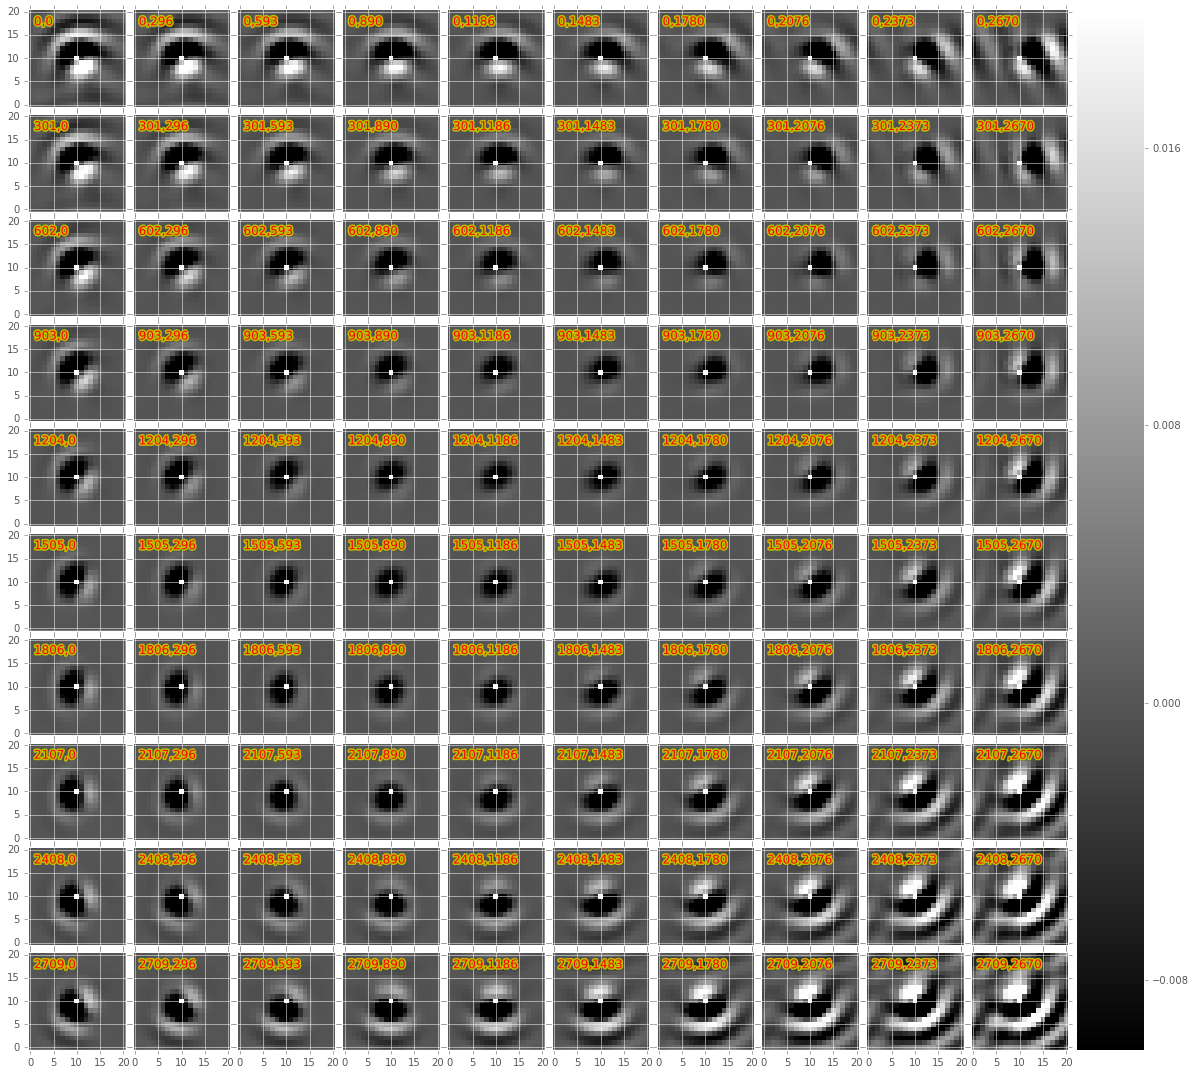

In [259]:
from lsst.ip.diffim import DecorrelateALKernelTask
print ipDiffim.__path__

var1 = decorrelate.computeVarianceMean(ssub)
var2 = decorrelate.computeVarianceMean(tsub)
print var1, var2

kimages2 = [DecorrelateALKernelTask._fixOddKernel(kimg) for kimg in kimages]

corrKernels = [DecorrelateALKernelTask._computeDecorrelationKernel(kimg, svar=var1, tvar=var2) \
               for kimg in kimages2]
corrKernels = [DecorrelateALKernelTask._fixEvenKernel(kimg) for kimg in corrKernels]

titles = ['%d,%d' % (x,y) for \
          x in np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.) for \
          y in np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.)]
dit.plotImageGrid(corrKernels, imScale=2., clim=(-0.01,0.02), titles=titles) 

Now use variance from the specific subimage(s):

In [287]:
bbox = ssub.getBBox()

var1 = decorrelate.computeVarianceMean(ssub)
var2 = decorrelate.computeVarianceMean(tsub)
print var1, var2

kimages2 = [DecorrelateALKernelTask._fixOddKernel(kimg) for kimg in kimages]

def computeCorrKernels(ssub, tsub, kimg, ix, iy, justVars=False):
    xseq = np.linspace(bbox.getBeginX(), bbox.getEndX(), 10., dtype=int)
    yseq = np.linspace(bbox.getBeginY(), bbox.getEndY(), 10., dtype=int)
    #for ix, x in enumerate(xseq):
    #    for iy, y in enumerate(yseq):
    bb = afwGeom.Box2I(afwGeom.Point2I(xseq[ix], yseq[iy]), afwGeom.Point2I(xseq[ix+1]-1, yseq[iy+1]-1))
    ss = afwImage.ExposureF(ssub, bb)
    tt = afwImage.ExposureF(tsub, bb)
    var1 = decorrelate.computeVarianceMean(ss)
    if np.isnan(var1):
        var1 = np.nanmean(ss.getMaskedImage().getVariance().getArray())
    var2 = decorrelate.computeVarianceMean(tt)
    if np.isnan(var2):
        var2 = np.nanmean(tt.getMaskedImage().getVariance().getArray())
    if not np.isfinite(var2):
        tmp = np.copy(tt.getMaskedImage().getVariance().getArray())
        tmp = tmp[np.isfinite(tmp)]
        var2 = np.nanmean(tmp)
    if justVars:
        return var1, var2
    #print ix, iy, xseq[ix], yseq[iy], xseq[ix+1], yseq[iy+1], var1, var2
    #kimg = kimages2[ix, iy]
    corrKernel = DecorrelateALKernelTask._computeDecorrelationKernel(kimg, svar=var1, tvar=var2)
    corrKernel = DecorrelateALKernelTask._fixEvenKernel(corrKernel)
    return corrKernel

corrKernels2 = [computeCorrKernels(ssub, tsub, kimages2[ix*10+iy], ix, iy) for \
               ix in range(len(np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.))-1) for \
               iy in range(len(np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.))-1)]

76.774559021 44.4630746368


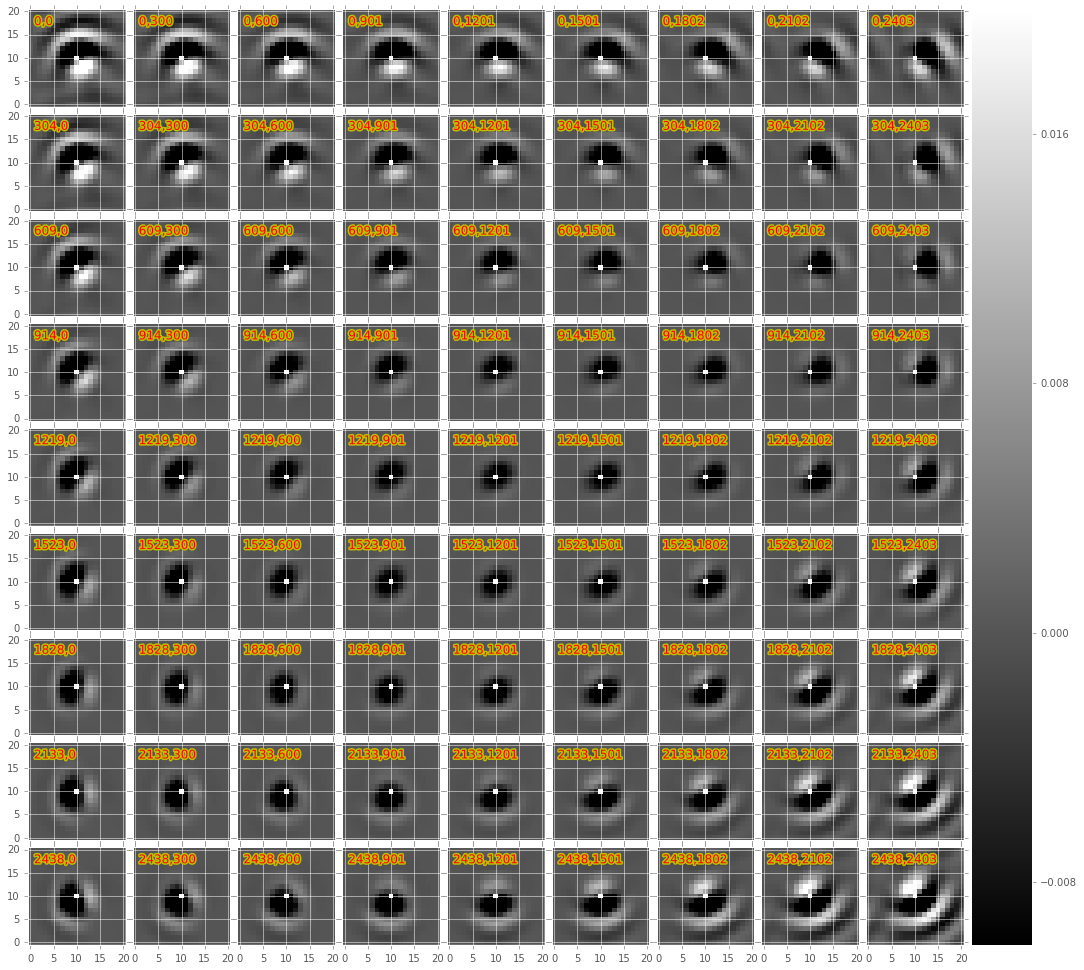

In [301]:
reload(dit)
titles = ['%d,%d' % (x,y) for \
         x in np.linspace(bbox.getBeginX(), bbox.getEndX()*9./10., 9.) for \
         y in np.linspace(bbox.getBeginY(), bbox.getEndY()*9./10., 9.)]
dit.plotImageGrid(corrKernels2, imScale=2., clim=(-0.01,0.02), titles=titles) 

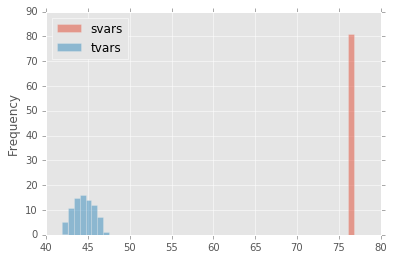

In [292]:
vars1 = [computeCorrKernels(ssub, tsub, kimages2[ix*10+iy], ix, iy, justVars=True)[0] for \
               ix in range(len(np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.))-1) for \
               iy in range(len(np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.))-1)]
vars2 = [computeCorrKernels(ssub, tsub, kimages2[ix*10+iy], ix, iy, justVars=True)[1] for \
               ix in range(len(np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.))-1) for \
               iy in range(len(np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.))-1)]

df = pd.DataFrame({'svars': vars1, 'tvars': vars2})
df.plot.hist(alpha=0.5, bins=50)

As a sanity check, make sure the spatialKernel looks the same when run w/ MWV's given command-line. Set the parameter `debug=True` in `DecorrelateALKernelTask.run()` and then run:

HERE: 100


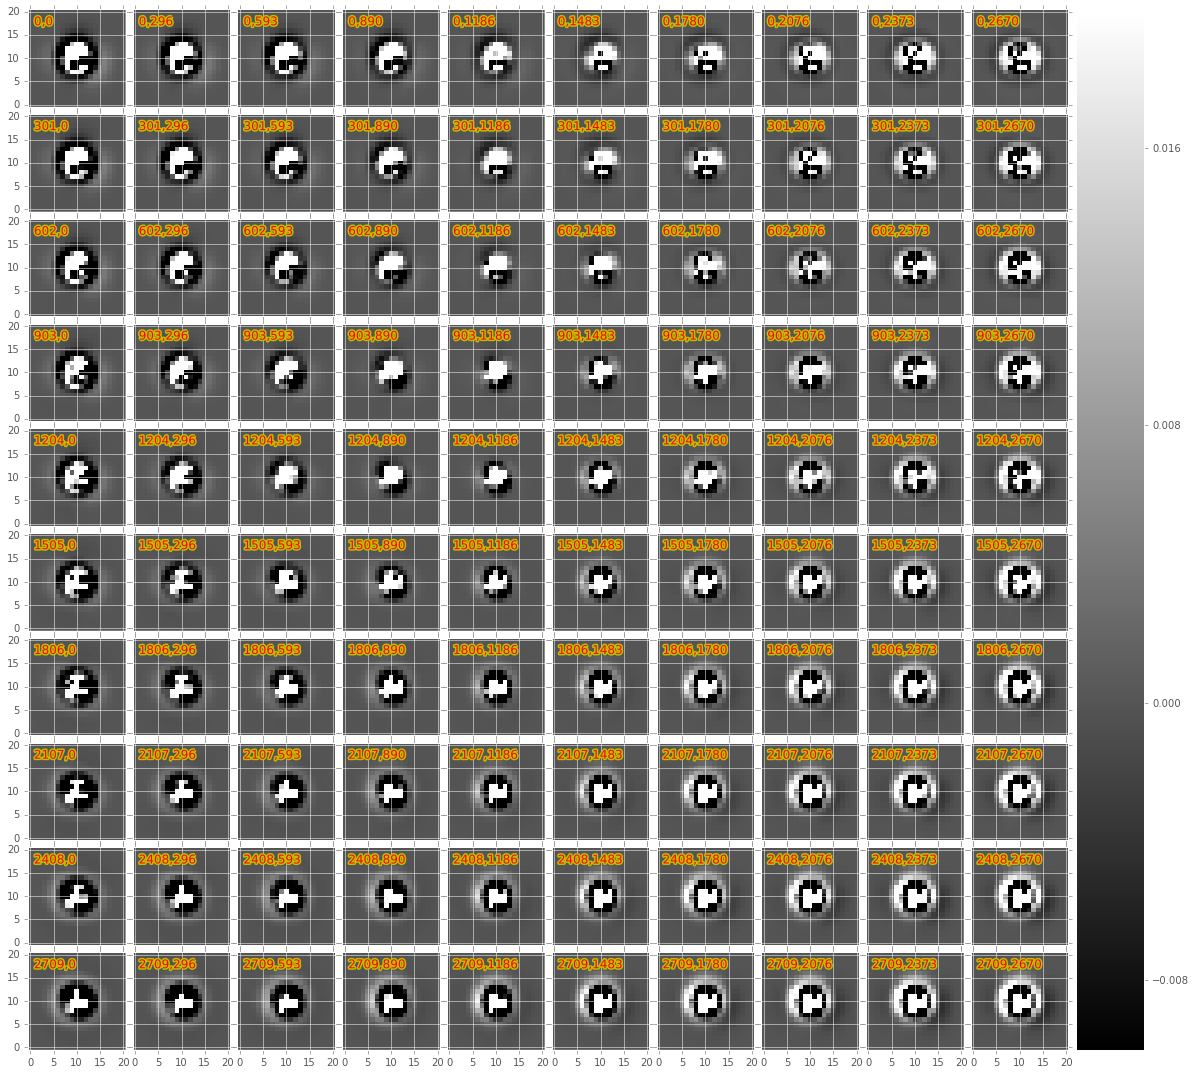

In [310]:
import cPickle
import gzip
spatialKernel = cPickle.load(gzip.GzipFile('spatialKernel.p.gz', 'rb'))

kimages = [getSpatialKernelImage(spatialKernel, xc, yc) for
           xc in np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.) for
           yc in np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.)]
print "HERE:", len(kimages)

titles = ['%d,%d' % (x,y) for \
          x in np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.) for \
          y in np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.)]
dit.plotImageGrid(kimages, imScale=2., clim=(-0.01, 0.02), titles=titles)

2.56945247706 0.14192645596 99 [0, 99]


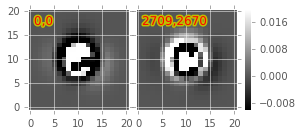

In [311]:
diffs = [np.sqrt(np.sum((k1 - k2)**2.)) for k1 in kimages for k2 in kimages]
coords = [[i, j] for i in range(len(kimages)) for j in range(len(kimages))]
print np.max(diffs), np.min(diffs[diffs!=0.0]), np.argmax(diffs), coords[np.argmax(diffs)]
coo = coords[np.argmax(diffs)]
dit.plotImageGrid([kimages[coo[0]], kimages[coo[1]]], imScale=2., clim=(-0.01, 0.02), 
                  titles=[titles[coo[0]], titles[coo[1]]])

OK, well it seems that running the command line is different than what I get from just running the task. I don't know why. That is something to figure out "in the future".

['/Users/dreiss/GIT_REPOS/TICKETS/DM-7376/lsst/ip_diffim/python/lsst/ip/diffim']
76.774559021 51.5942878723


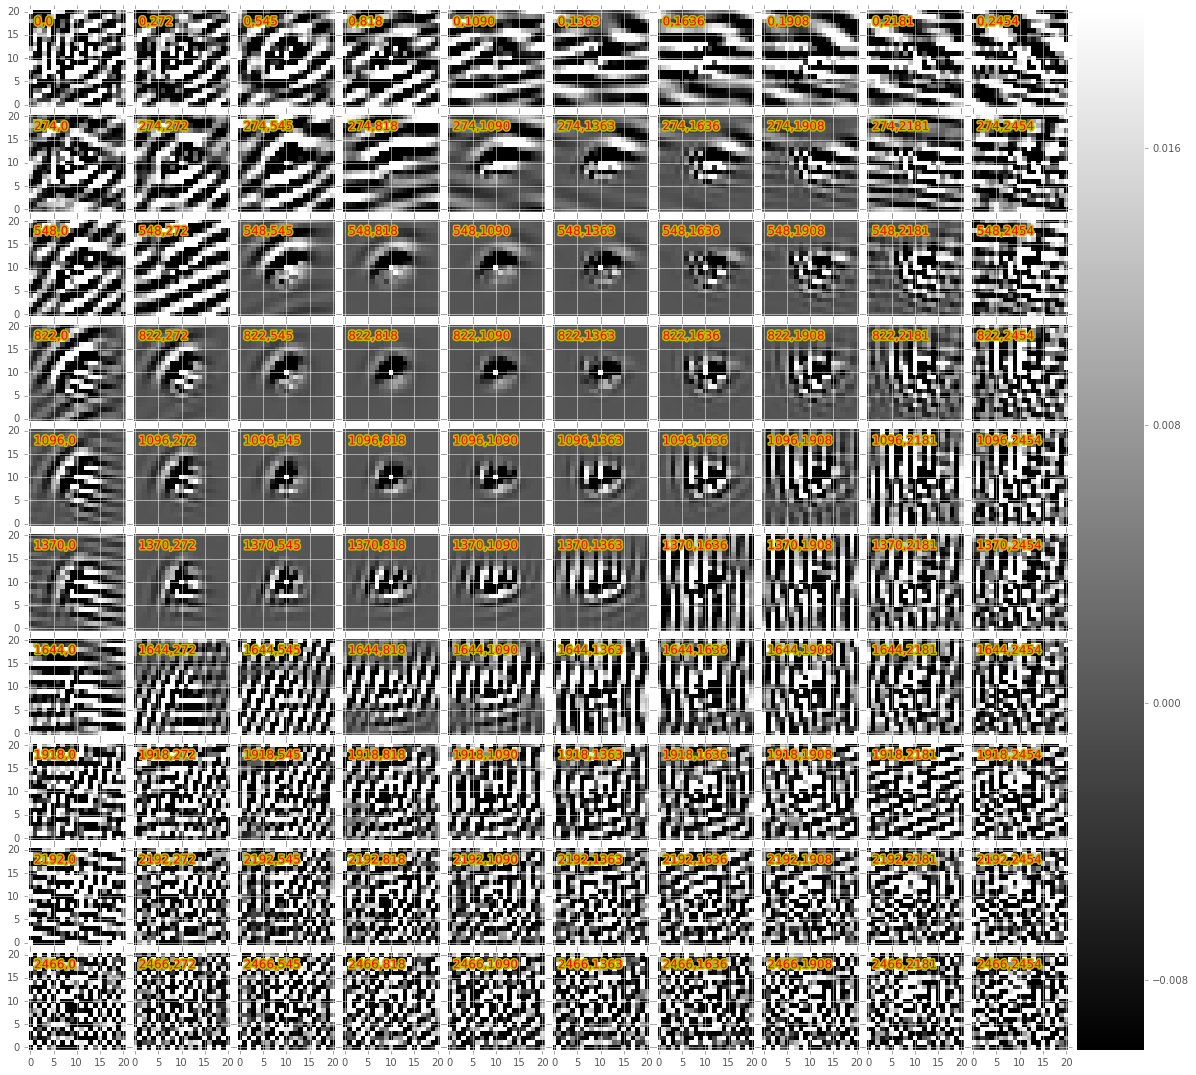

In [323]:
from lsst.ip.diffim import DecorrelateALKernelTask
print ipDiffim.__path__

templateSubImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20121028.fits')
scienceSubImage = afwImage.ExposureF('WIYN/test_dr1/calexp/SN2011gy_A_H_20111115.fits')

var1 = decorrelate.computeVarianceMean(scienceSubImage)
var2 = decorrelate.computeVarianceMean(templateSubImage)
print var1, var2

kimages2 = [DecorrelateALKernelTask._fixOddKernel(kimg) for kimg in kimages]

corrKernels = [DecorrelateALKernelTask._computeDecorrelationKernel(kimg, svar=var1, tvar=var2) \
               for kimg in kimages2]
corrKernels = [DecorrelateALKernelTask._fixEvenKernel(kimg) for kimg in corrKernels]

titles = ['%d,%d' % (x,y) for \
          x in np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.) for \
          y in np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.)]
dit.plotImageGrid(corrKernels, imScale=2., clim=(-0.01,0.02), titles=titles) 

In [316]:
tbox = templateSubImage.getBBox()
sbox = scienceSubImage.getBBox()
sbox.clip(tbox)

tsub = afwImage.ExposureF(templateSubImage, sbox)
ssub = afwImage.ExposureF(scienceSubImage, sbox)
bbox = ssub.getBBox()

var1 = decorrelate.computeVarianceMean(ssub)
var2 = decorrelate.computeVarianceMean(tsub)
print var1, var2

kimages2 = [DecorrelateALKernelTask._fixOddKernel(kimg) for kimg in kimages]

def computeCorrKernels(ssub, tsub, kimg, ix, iy, justVars=False):
    xseq = np.linspace(bbox.getBeginX(), bbox.getEndX(), 10., dtype=int)
    yseq = np.linspace(bbox.getBeginY(), bbox.getEndY(), 10., dtype=int)
    #for ix, x in enumerate(xseq):
    #    for iy, y in enumerate(yseq):
    bb = afwGeom.Box2I(afwGeom.Point2I(xseq[ix], yseq[iy]), afwGeom.Point2I(xseq[ix+1]-1, yseq[iy+1]-1))
    ss = afwImage.ExposureF(ssub, bb)
    tt = afwImage.ExposureF(tsub, bb)
    var1 = decorrelate.computeVarianceMean(ss)
    if np.isnan(var1):
        var1 = np.nanmean(ss.getMaskedImage().getVariance().getArray())
    var2 = decorrelate.computeVarianceMean(tt)
    if np.isnan(var2):
        var2 = np.nanmean(tt.getMaskedImage().getVariance().getArray())
    if not np.isfinite(var2):
        tmp = np.copy(tt.getMaskedImage().getVariance().getArray())
        tmp = tmp[np.isfinite(tmp)]
        var2 = np.nanmean(tmp)
    if justVars:
        return var1, var2
    #print ix, iy, xseq[ix], yseq[iy], xseq[ix+1], yseq[iy+1], var1, var2
    #kimg = kimages2[ix, iy]
    corrKernel = DecorrelateALKernelTask._computeDecorrelationKernel(kimg, svar=var1, tvar=var2)
    corrKernel = DecorrelateALKernelTask._fixEvenKernel(corrKernel)
    return corrKernel

corrKernels2 = [computeCorrKernels(ssub, tsub, kimages2[ix*10+iy], ix, iy) for \
               ix in range(len(np.linspace(bbox.getBeginX(), bbox.getEndX(), 10.))-1) for \
               iy in range(len(np.linspace(bbox.getBeginY(), bbox.getEndY(), 10.))-1)]

76.774559021 51.5942878723


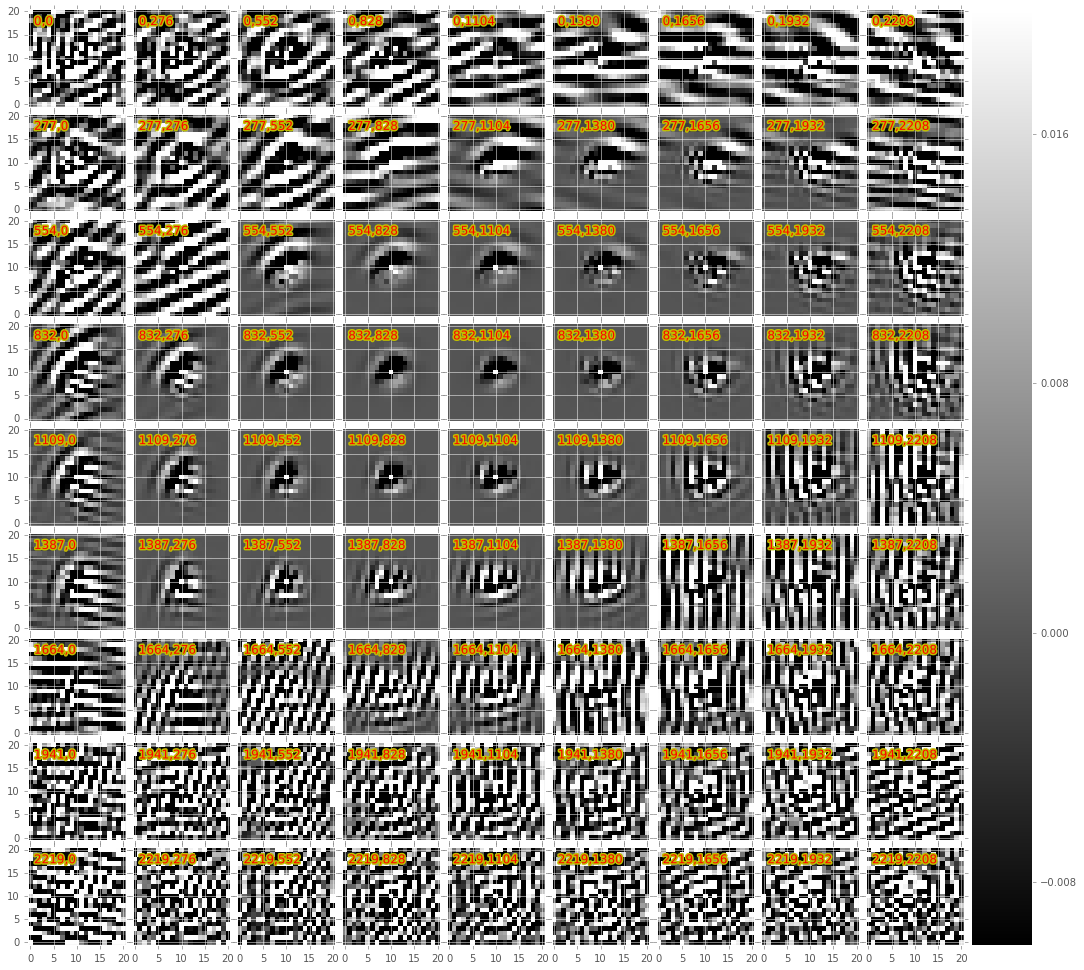

In [319]:
reload(dit)
titles = ['%d,%d' % (x,y) for \
         x in np.linspace(bbox.getBeginX(), bbox.getEndX()*9./10., 9.) for \
         y in np.linspace(bbox.getBeginY(), bbox.getEndY()*9./10., 9.)]
dit.plotImageGrid(corrKernels2, imScale=2., clim=(-0.01,0.02), titles=titles) 

In [324]:
print [kimg.sum() for kimg in kimages]

[0.99999999999999922, 1.0, 1.0, 1.0000000000000004, 1.0000000000000004, 1.0000000000000007, 1.0000000000000011, 1.0000000000000004, 1.0000000000000007, 1.0000000000000009, 1.0, 1.0000000000000004, 0.99999999999999978, 1.0000000000000004, 1.0000000000000007, 1.0000000000000004, 1.0000000000000004, 1.0000000000000013, 1.0000000000000013, 1.0000000000000013, 0.99999999999999956, 1.0000000000000002, 0.99999999999999967, 1.0000000000000004, 1.0000000000000007, 1.0000000000000004, 1.0000000000000004, 1.0000000000000013, 1.0000000000000018, 1.0000000000000011, 1.0000000000000004, 1.0, 1.0, 1.0, 1.0000000000000004, 1.0000000000000002, 1.0000000000000011, 1.0000000000000013, 1.0000000000000004, 1.0000000000000007, 1.0000000000000009, 1.0000000000000002, 1.0000000000000004, 1.0000000000000004, 1.0000000000000011, 1.0000000000000007, 1.0000000000000009, 1.0000000000000011, 1.0000000000000013, 0.99999999999999956, 0.99999999999999933, 1.0000000000000002, 1.0, 1.0000000000000004, 1.0000000000000011